In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import pylab as pl
sys.path.insert(0, '..')

import pymoca.parser
import pymoca.backends.sympy.generator as generator
import pylab as pl

In [2]:
ast = pymoca.parser.parse('''
model Aircraft
    parameter Real c = 0.1;
    Real x(start=10);
    Real y(start=100);
equation
    der(x) = -x + y;
    der(y) = -c*y;
end Aircraft;
''')

In [3]:
src = generator.generate(ast, 'Aircraft')
print(src)


# do not edit, generated by pymoca

from __future__ import print_function, division
import sympy
import sympy.physics.mechanics as mech
from pymoca.backends.sympy.runtime import OdeModel
from sympy import sin, cos, tan


class Aircraft(OdeModel):

    def __init__(self):

        super(Aircraft, self).__init__()

        # states
        x, y = mech.dynamicsymbols('x, y')
        self.x = sympy.Matrix([x, y])
        self.x0 = {
            x : 10.0,
            y : 100.0,
            }

        # variables
        self.v = sympy.Matrix([])

        # constants
        self.c = sympy.Matrix([])
        self.c0 = {
            }

        # parameters
        c = sympy.symbols('c')
        self.p = sympy.Matrix([c])
        self.p0 = {
            c : 0.1,
            }

        # inputs
        self.u = sympy.Matrix([])
        self.u0 = {
            }

        # outputs
        self.y = sympy.Matrix([])

        # equations
        self.eqs = [
            (x).diff(self.t) - (- x + y

In [4]:
exec(src)
ac = Aircraft()
res = ac.simulate()
res

{'t': array([ 0.  ,  0.01,  0.02, ...,  9.98,  9.99, 10.  ]),
 'u': array([], shape=(1001, 0), dtype=float64),
 'x': array([[10.0000000000000, 100.000000000000],
        [10.895012161296487, 99.90005005160832],
        [11.780129353073226, 99.8001999349418],
        ...,
        [40.952635133614756, 36.8615936557411],
        [40.91174521009363, 36.82475048674022],
        [40.87089575475432, 36.78794414249291]], dtype=object),
 'y': array([], shape=(1001, 0), dtype=float64)}

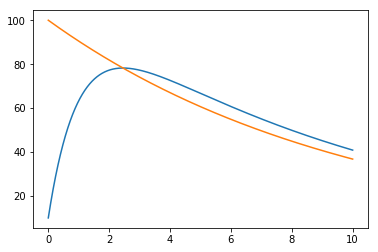

In [5]:
pl.plot(res['t'], res['x'])

In [6]:
ss = ac.linearize()
ss[0]

matrix([[-1. ,  1. ],
        [ 0. , -0.1]])

In [7]:
ac.linearize_symbolic()

[Matrix([
 [-1,  1],
 [ 0, -c]]), Matrix(0, 0, []), Matrix(0, 0, []), Matrix(0, 0, [])]

In [8]:
pl.matrix(ss[0]).astype(float)

matrix([[-1. ,  1. ],
        [ 0. , -0.1]])